<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/MEWMA_on_Principle_Component_Variates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEWMA on principle compoent variates

---
This code demonstrates how to compute eigen vectors based on Phase I data and use the eigen values to choose the most important components. Then MEWMA chart is plotted for the chosen principle components

In [ ]:
# Import required libraries
from scipy.stats import beta
from scipy.stats import f
from scipy.stats import multivariate_normal
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

# m=100, n=1 in Phase I and 15 samples for Phase II p=6

In [ ]:
cov = np.array([[4.0, 2.5, 1.5, 0,0,5], [2.5, 6.0,1.0,0,0,0], [1.5,1.0,2, 0,0,0], [0,0,0,1,0,0], [0,0,0,0,1,0],[5,0,0,0,0,10]])
cov

array([[ 4. ,  2.5,  1.5,  0. ,  0. ,  5. ],
       [ 2.5,  6. ,  1. ,  0. ,  0. ,  0. ],
       [ 1.5,  1. ,  2. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ,  0. ],
       [ 5. ,  0. ,  0. ,  0. ,  0. , 10. ]])

/usr/local/lib/python3.7/dist-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


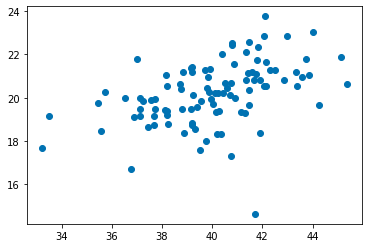

In [ ]:
# to create multivariate variates given mean vector and covariance matrix
mean1 = np.array([40, 65, 20, 10, 5, 100])
mean2 = np.array([40, 70, 20, 10, 5, 110])
cov = np.array([[4.0, 2.5, 1.5, 0,0,5], [2.5, 6.0,1.0,0,0,0], [1.5,1.0,2, 0,0,0], [0,0,0,1,0,0], [0,0,0,0,1,0],[5,0,0,0,0,10]])
# cov2 = np.array([[4.0, 2.5, 1.5], [2.5, 6.0,1.0], [1.5,1.0,5.0]])
x1 = multivariate_normal.rvs(mean1, cov, 100)
x2 = multivariate_normal.rvs(mean2, cov, 15)
# x3 = multivariate_normal.rvs(mean1, cov2, 15)
plt.scatter(x1[:,0],x1[:,2])
plt.show()

In [ ]:
# Generate a mean vector shift p=3 time series
# series1 has a mean shift at the 2nd dimension
data_all=np.vstack((x1,x2))

In [ ]:
df = pd.DataFrame(data_series1, columns = ['x1','x2','x3','x4','x5','x6'])
df.head()

,x1,x2,x3,x4,x5,x6
0,38.228428,67.742039,18.805236,9.293908,6.275265,96.093507
1,37.720011,62.426100,19.933771,8.795792,5.414115,97.184674
2,37.553703,62.860477,19.874712,8.847905,3.760341,95.986082
3,39.141350,64.455837,19.481270,9.373430,5.792406,100.692626
4,38.188105,65.602573,20.540321,9.253324,3.553646,96.970654


In [ ]:
# this code successfully generate the data mult_data1.csv in My Google directory
df.to_csv(r'drive/My Drive/Colab Notebooks/IMSE_Data_Science/Data/mult_data1.csv')

# **Now we will use the mean and sigma estimated from the Phase I data for priciple compoments

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x1)
data_all = sc.fit_transform(data_all)

In [ ]:
# compute the eigen vector and values
cov_mat = np.cov(x1.T)

# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Eigen values=", eigen_vals)
print("Eigen vectors=", eigen_vecs)

Eigen values= [2.304966   0.01839493 1.22751729 1.01802937 0.67681584 0.81488264]
Eigen vectors= [[ 0.64834378  0.73560923 -0.07013674 -0.06815294  0.15020227 -0.08002932]
 [ 0.37274182 -0.23804536 -0.51002629 -0.04088931 -0.73384093 -0.06384891]
 [ 0.32080279 -0.25091774 -0.2157212   0.65198793  0.31320014  0.51420583]
 [ 0.12653562 -0.00877768  0.49059331  0.63425215 -0.26386733 -0.52089167]
 [ 0.18354514  0.03039146  0.62522978 -0.17289578 -0.3957313   0.62287964]
 [ 0.53674889 -0.58159527  0.2383785  -0.36935923  0.33851619 -0.25652252]]


In [ ]:
eigen_sum=eigen_vals.sum()
weights=eigen_vals/eigen_sum
print("Weights of Eigen Values =", weights)

Weights of Eigen Values = [0.38031939 0.00303516 0.20254035 0.16797485 0.11167461 0.13445564]


The choice of z1, z3, and z4 will attribute to 74% of the variation

In [ ]:
eigen_vecs[0].shape

(6,)

In [ ]:
x1.shape

(100, 6)

In [ ]:
#first eigen vector
c1=np.reshape(eigen_vecs[0], (6,1))

In [ ]:
z1=x1@c1

# Compute the principle component values Z's from original data X's

In [ ]:
# compute the transformed values z
Z1=x1 @ eigen_vecs
Z2=data_all @ eigen_vecs

In [ ]:
type(Z)

numpy.ndarray

In [ ]:
df1 = pd.DataFrame(Z1, columns = ['z1','z2','z3','z4','z5', 'z6'])
df2 = pd.DataFrame(Z2, columns = ['z1','z2','z3','z4','z5', 'z6'])

In [ ]:
Z1=df1[['z1','z3', 'z4']]
Z1=Z1.to_numpy()
Z2=df2[['z1','z3', 'z4']]
Z2=Z2.to_numpy()
Z2.shape

(115, 3)

In [ ]:
class MEWMA:

    _title = "MEWMA Control Chart"

    def fit(self, data, lam, H, mu, sigma):
        # H is the upper control limits & lam is the EWMA coef lambda
        self.data = np.array(data)
        self.numsample = len(data)
        #size is p the number of variates
        self.size=len(np.mean(data, axis=0))
        self.lam=lam
        self.H=H
        Z = []
        DIF=[]
        Ztminus1=np.zeros(self.size)
        for sample in data:
            dif = sample - mu
            Zt= lam * dif + (1-lam) * Ztminus1
            Z.append(Zt)
            Ztminus1=Zt
            DIF.append(dif)

        # compute EWMA and T2 statistics
        colmean = np.mean(data, axis=0)
        values = []
        i=1
        for zi in Z:
            matcov = lam*(1-(1-lam)**(2*i))/(2-lam) * sigma
            matinv = np.linalg.inv(matcov)      
            value = matinv.dot(zi.T).dot(zi)
            values.append(value)
            i+=1 
        
        matcov = lam/(2-lam) * sigma
        matinv = np.linalg.inv(matcov)  
        dif_avgs=np.mean(DIF, axis=0)    
       
        self.T2=values
        self.lcl = 0
        self.center = matinv.dot(dif_avgs.T).dot(dif_avgs)
        self.ucl = H

        #return (values, center, lcl, ucl, self._title)

    def ControlChart(self):
        ucl = np.zeros(self.numsample)
        lcl = np.zeros(self.numsample)
              
        for i in range(self.numsample):
            lcl[i] = self.lcl
            ucl[i] = self.ucl
              
        plt.figure(figsize=(15,5))
        plt.plot(self.T2,marker="o",color="k",label="T2")
        plt.plot([self.center]*self.numsample,color="k",alpha=0.35)
        plt.plot(ucl,color="r",label="UCL {}".format(ucl[len(ucl)-1].round(2)))
        plt.plot(lcl,color="r",label="LCL {}".format(lcl[len(lcl)-1].round(2)))
        plt.title("MEWMA Conrol Chart")
        plt.legend(loc="upper left")
        plt.show()

In [ ]:
mean1=np.mean(Z1, axis=0)
matcov1=np.cov(Z1.T)
matcov1.shape
mean1

array([ 8.07576228e-15, -1.06670228e-14, -6.60582700e-16])

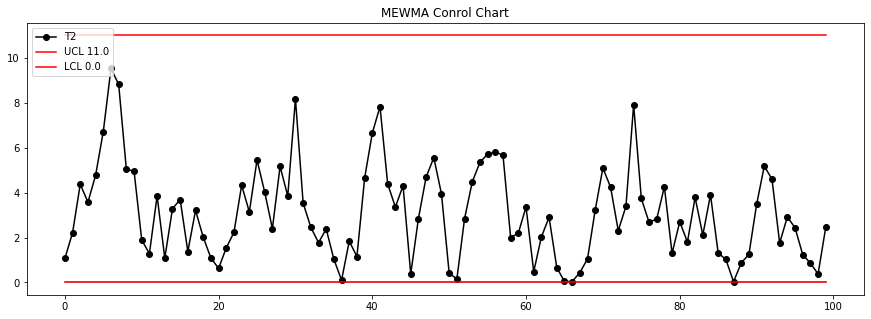

In [ ]:
# MEWMA chart
chart = MEWMA()
# use lambda=0.15 H=11 for delta=1.5 Ref Prabhu and Runger 1997
chart.fit(data=Z1, lam=0.2, H=11, mu=mean1, sigma=matcov1)
chart.ControlChart()

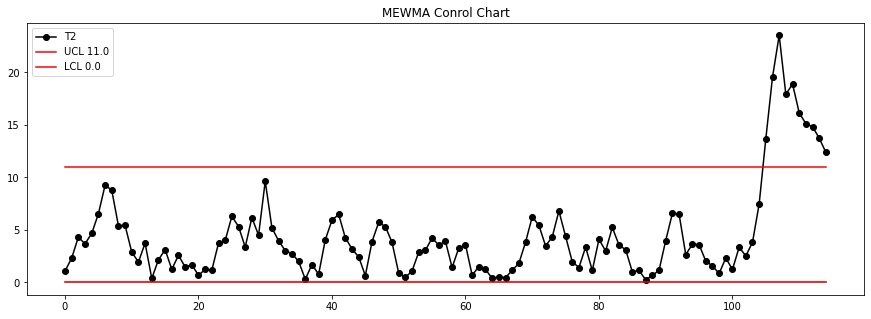

In [ ]:
# MEWMA chart on both Phase I and Phase II data
chart = MEWMA()
# use lambda=0.15 H=11 for delta=1.5 Ref Prabhu and Runger 1997
chart.fit(data=Z2, lam=0.2, H=11, mu=mean1, sigma=matcov1)
chart.ControlChart()